# Goal


All customers have diverse needs and desires, and respond to your marketing campaigns in different ways.

Therefore, our goal is segmenting customers, which can significantly improve the marketing performance, making campaigns more relevant to more of customers, ultimately increasing response rates and sales. 

# Method

RFM analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups.

* RECENCY (R): Time since last purchase
* FREQUENCY (F): Total number of purchases
* MONETARY VALUE (M): Total monetary value

## Benefits of RFM Analysis
* Increased customer retention
* Increased response rate
* Increased conversion rate
* Increased revenue

# Data Acquisition

In [68]:
import csv
import seaborn as sns
import numpy as np
from matplotlib import pyplot  as plt
import pandas as pd

In [2]:
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Sanity Check

Because customer clusters vary by geography, we need to do santity check about customer population distribution in different countries, then see whether does customer population distribution is in average or not.

In [3]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [9]:
customer_histroy= df[['Country','CustomerID']].drop_duplicates()
customer_histroy.groupby(['Country']).count().sort_values('CustomerID', ascending=False)

,CustomerID
Country,
United Kingdom,3950
Germany,95
France,87
Spain,31
Belgium,25
Switzerland,21
Portugal,19
Italy,15
Finland,12


More than 90% of the customers in the data are from United Kingdom, so here I’ll restrict the data to United Kingdom only.

In [10]:
df_UK = df.loc[df['Country'] == 'United Kingdom']

# Data Screening

## Missing Value 

In [11]:
df_UK.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
lower          493807
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

There are 133600 missing values in CustomerID column, since our analysis is based on customers, we will remove these missing values.

In [13]:
df_UK.dropna(subset=['CustomerID'],inplace=True)
df_UK.isnull().sum(axis=0)

/Users/YiChen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


InvoiceNo           0
StockCode           0
lower          360581
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
dtype: int64

## Outlier Detection
* Quantity and Unit Price can't be negative
* InvoiceDate can't be out of range

In [16]:
df_UK[['UnitPrice','Quantity']].describe()

,UnitPrice,Quantity
count,361878.000000,361878.000000
mean,3.256007,11.077029
std,70.654731,263.129266
min,0.000000,-80995.000000
25%,1.250000,2.000000
50%,1.950000,4.000000
75%,3.750000,12.000000
max,38970.000000,80995.000000


Remove the negative values in Quantity column

In [17]:
df_UK = df_UK[(df_UK['Quantity']>0)]
df_UK.Quantity.min()

1

In [23]:
df_UK['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [24]:
df_UK['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')


After cleaning up, we now dealing with 354345 rows and 9 columns

In [19]:
df_UK.shape

(354345, 9)

# Exploratory Data Analysis

In [20]:
df_UK.nunique()

InvoiceNo      16649
StockCode       3645
lower            713
Description     3844
Quantity         294
InvoiceDate    15615
UnitPrice        403
CustomerID      3921
Country            1
dtype: int64

There are 3921 customer and 3844 items in UK retail store

In [27]:
df_UK['TotalPrice'] = df_UK['Quantity'] * df_UK['UnitPrice']
df_UK.head()

/Users/YiChen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## RFM Table

In [28]:
df_UK['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [29]:
df_UK['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

Since recency is calculated for a given point in time and our sample orders table ranges from Dec 1, 2010 to Dec 09, 2011 we will say NOW is Dec 10, 2011.

In [30]:
import datetime as dt
NOW = dt.datetime(2011,12,10)

In [32]:
df_UK['InvoiceDate']= pd.to_datetime(df_UK['InvoiceDate'])

/Users/YiChen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Calculate RFM metrics for each customer

In [77]:
rfm_table=df_UK.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW- x.max()).days #RECENCY (R): Time since last purchase
                                ,'InvoiceNo': lambda x: len(x) #FREQUENCY (F): Total number of purchases
                                ,'TotalPrice': lambda x: x.sum()}) #MONETARY VALUE (M): Total monetary value
rfm_table.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'TotalPrice': 'monetary_value'}, inplace=True)

In [78]:
rfm_table.head()

,recency,frequency,monetary_value
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


Interpretation:

CustomerID 12346 has frequency:1, monetary value:$77183.60 and recency:324 days.

CustomerID 12747 has frequency: 103, monetary value: $4196.01 and recency: 1 day



### Validating RFM Table

In [79]:
first_customer = df_UK[df_UK['CustomerID']== 12346.0]
first_customer

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
61619,541431,23166,NaN,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6


The first customer has shopped only once, bought one item at a huge quantity(74215). The unit price is very low, seems a clearance sale.

In [80]:
(NOW - first_customer.iloc[0]['InvoiceDate']).days== 325

True

## RFM segmentation table

To perform RFM analysis, we divide customers into four equal groups according to the distribution of values for recency, frequency, and monetary value.

Four equal groups across three variables create 64 (4x4x4) different customer segments, which is a manageable number.



| Recency (R) | Frequency (F)   | Monetary Value (M) |
|------|------|------|
|   Quartile 1 (R=1)  | Quartile 1 (F=1)|   Quartile 1 (M=1)  | 
|   Quartile 2 (R=2)  | Quartile 2 (F=2)|   Quartile 2 (M=2)  | 
|   Quartile 3 (R=3)  | Quartile 3 (F=3)|   Quartile 3 (M=3)  | 
|   Quartile 4 (R=4)  | Quartile 4 (F=4)|   Quartile 4 (M=4)  | 

For example, let’s look at a customer who:

* is within the group who purchased most recently (R is closing to 0, R=1)
* is within the group who purchased most frequantly (F is more far way from 0, F=1 )
* is within the group who spent the most (M is more far way from 0, M=1)

This customer belongs to RFM segment 1-1-1 (Best Customers), (R=1, F=1, M=1)

Below is a table with key RFM segments:

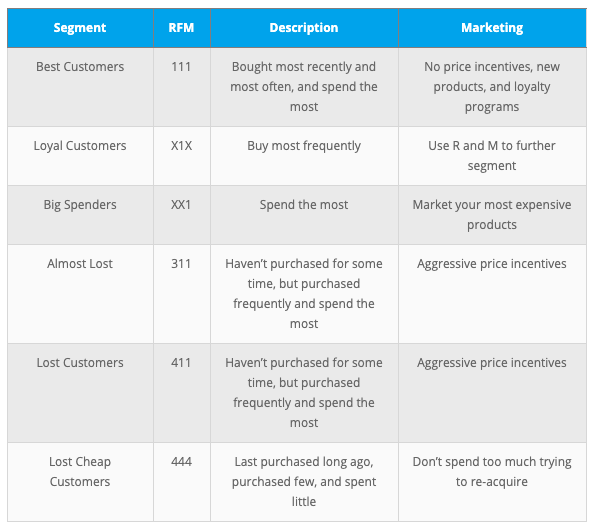

In [86]:
segmented_rfm = rfm_table.copy()


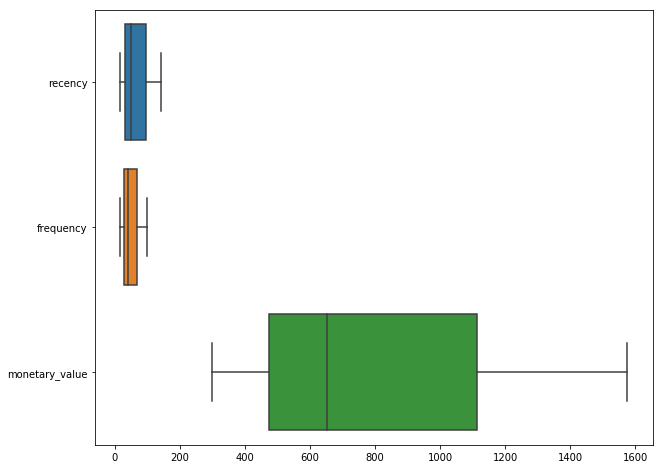

In [81]:
plt.figure(figsize=(10,8))
quantiles=rfm_table.quantile(q=[0.25,0.5,0.75])
sns.boxplot(data=quantiles,orient='h')

In [82]:
quantiles = quantiles.to_dict()
quantiles

{'frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'monetary_value': {0.25: 300.03999999999996,
  0.5: 651.8199999999999,
  0.75: 1575.89},
 'recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0}}

In [83]:
def R_Score(x,d,p):
    if x<d[p][0.25]:
        return 1
    elif x<d[p][0.5]:
        return 2
    elif x<d[p][0.75]:
        return 3
    else:
        return 4
    
def F_M_Score(x,d,p):
    if x<d[p][0.25]:
        return 4
    elif x<d[p][0.5]:
        return 3
    elif x<d[p][0.75]:
        return 2
    else:
        return 1

In [87]:
segmented_rfm['R_quartile']=rfm_table['recency'].apply(R_Score,args=(quantiles,'recency'))
segmented_rfm['F_quartile']=rfm_table['frequency'].apply(F_M_Score,args=(quantiles,'frequency'))
segmented_rfm['M_quartile']=rfm_table['monetary_value'].apply(F_M_Score,args=(quantiles,'monetary_value'))

In [88]:
segmented_rfm.head()

,recency,frequency,monetary_value,R_quartile,F_quartile,M_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


There are 64 customer segments in the table. 
In order to seperate each customer segment more convenient, let's combine quartile value into string.

In [92]:
segmented_rfm['RFM_score']=segmented_rfm['R_quartile'].map(str)\
                            +segmented_rfm['R_quartile'].map(str)\
                            +segmented_rfm['R_quartile'].map(str)


In [93]:
segmented_rfm.head()

,recency,frequency,monetary_value,R_quartile,F_quartile,M_quartile,RFM_score
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,444
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4596,33719.73,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,111


"Best Customers" accounts for 23.8% in total, however, "Lost Cheap Customers" accounts for 25%. 

In [97]:
segmented_rfm['count']=1
segmented_rfm.groupby('RFM_score').count()['count']

RFM_score
111     936
222     997
333    1005
444     983
Name: count, dtype: int64

Here is top 10 of our best customers who spent the msot

In [99]:
segmented_rfm[segmented_rfm['RFM_score']=='111'].sort_values('monetary_value', ascending=False).head(10)

,recency,frequency,monetary_value,R_quartile,F_quartile,M_quartile,RFM_score,count
CustomerID,,,,,,,,
18102.0,0,431,259657.30,1,1,1,111,1
17450.0,8,337,194550.79,1,1,1,111,1
16446.0,0,3,168472.50,1,4,1,111,1
17511.0,2,963,91062.38,1,1,1,111,1
16684.0,4,277,66653.56,1,1,1,111,1
14096.0,4,5111,65164.79,1,1,1,111,1
13694.0,3,568,65039.62,1,1,1,111,1
15311.0,0,2379,60767.90,1,1,1,111,1
13089.0,2,1818,58825.83,1,1,1,111,1


reference: [Blast Analytics and Marketing](https://www.blastam.com/blog/rfm-analysis-boosts-sales)